In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Personal Folders\Course\Atomcamp\16. ML\Assignment 1\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.shape

(1338, 7)

<h3>Data Preprocessing:<h3\>

**Missing Values**

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Hence,
1. No missing Values
2. Data Types are ok.

**Categorical to Numerical**

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse_output=False)
encoded_columns=encoder.fit_transform(data[['sex','smoker']])
feature_names=encoder.get_feature_names_out(['sex','smoker'])

In [6]:
feature_names

array(['sex_male', 'smoker_yes'], dtype=object)

In [7]:
encoded_columns

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [8]:
encoded_df_binary=pd.DataFrame(encoded_columns,columns=feature_names)
encoded_df_binary.head(2)

,sex_male,smoker_yes
0,0.0,1.0
1,1.0,0.0


In [9]:
encoder=OneHotEncoder(sparse_output=False)
encoded_columns=encoder.fit_transform(data[['region']])
feature_names=encoder.get_feature_names_out(['region'])
encoded_df_region=pd.DataFrame(encoded_columns,columns=feature_names)
encoded_df_region.head(2)

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0


In [10]:
#Concatenating encoded_dfs
encoded_df=pd.concat([encoded_df_binary,encoded_df_region],axis=1)
encoded_df.head(2)

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#Concatenating encoded_df with data
data_encoded=pd.concat([data.drop(['sex','smoker','region'],axis=1),encoded_df],axis=1)
data_encoded.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.77,1,1725.5523,1.0,0.0,0.0,0.0,1.0,0.0


<h3>EDA<h3\>

**Data Distribution**

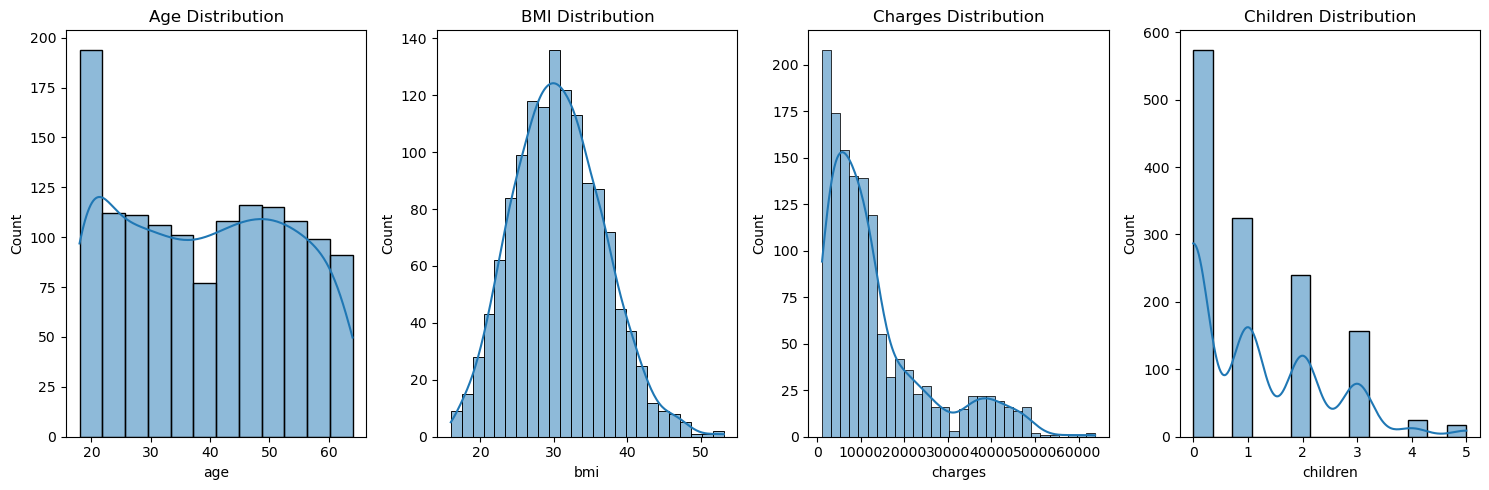

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Setting up the matplotlib figure
plt.figure(figsize=(15, 5))

# Plotting the distribution of 'age'
plt.subplot(1, 4, 1)
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

# Plotting the distribution of 'bmi'
plt.subplot(1, 4, 2)
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')

# Plotting the distribution of 'charges'
plt.subplot(1, 4, 3)
sns.histplot(data['charges'], kde=True)
plt.title('Charges Distribution')

# Plotting the distribution of 'children'
plt.subplot(1, 4, 4)
sns.histplot(data['children'], kde=True)
plt.title('Children Distribution')

# Displaying the plots
plt.tight_layout()
plt.show()


Age=Unifrom Distribution
bmi=Normal Distribution
charges=right skewed
children=right skewed

**Standerdization and Normalization**

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Standerdizing age and bmi
standard_scaler=StandardScaler()
data_encoded[['age','bmi']]=standard_scaler.fit_transform(data_encoded[['age','bmi']])

#Normalizing Charges
Min_Max_Scaler=MinMaxScaler()
data_encoded[['charges']]=Min_Max_Scaler.fit_transform(data_encoded[['charges']])
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0.251611,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,1,0.009636,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,3,0.053115,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,0,0.333010,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,0,0.043816,1.0,0.0,0.0,1.0,0.0,0.0


**Realtionship between features and target variable**

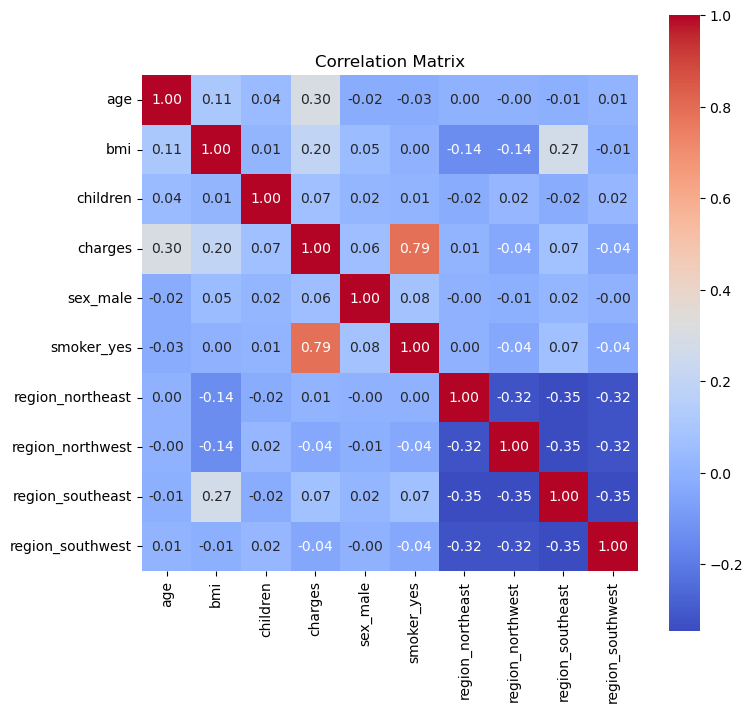

In [17]:
corr_matrix=data_encoded.corr()
# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()

Charges has strong positive correaltion with Smoker Yes and positive corelation with Age and BMI

**Identify outliers or influential points**

Text(0.5, 1.0, 'Smoker Status vs Charges')

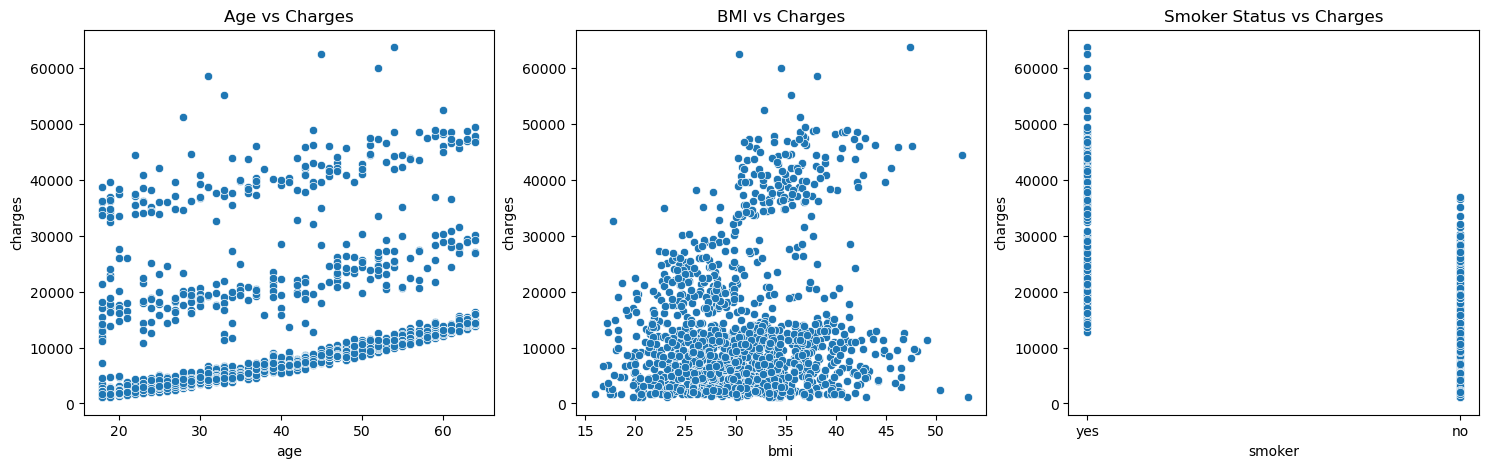

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(18,5))
sns.scatterplot(x='age',y='charges',data=data,ax=axes[0])
axes[0].set_title("Age vs Charges")
sns.scatterplot(x='bmi',y='charges',data=data,ax=axes[1])
axes[1].set_title("BMI vs Charges")
sns.scatterplot(x='smoker',y='charges',data=data,ax=axes[2])
axes[2].set_title("Smoker Status vs Charges")

<h3>Model Development<h3\>

In [36]:
X=data_encoded.drop('charges',axis=1) #features
y=data_encoded['charges'] #target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# Making predictions on the test data
y_pred = model.predict(X_test)
# Calculating R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7835929767120722
Mean Squared Error: 0.00856006982417588


**Interpretation**
An R-squared value of 0.7836 means that approximately 78.36% of the variation in medical charges can be explained by the model's inputs (the features in your model like age, bmi, etc.).
An MSE of 0.00856 means that, on average, the square of the difference between the predicted medical charges and the actual charges is 0.00856

In [44]:
Coefficients=pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
Coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
smoker_yes,0.377521
age,0.057609
bmi,0.032800
region_northeast,0.007336
children,0.006788
region_northwest,0.001419
sex_male,-0.000297
region_southeast,-0.003165
region_southwest,-0.005590


<h3>Model Development<h3\>

**smoker_yes** (0.377521):

Being a smoker has a significant positive impact on medical charges. The relatively high coefficient indicates that, holding all other factors constant, smokers are expected to have higher medical charges compared to non-smokers. The difference is substantial, given the magnitude of the coefficient.

**age** (0.057609):

Age has a positive correlation with medical charges. As age increases, so do the medical charges. The effect is moderate but notable.

**bmi** (0.032800):

BMI also has a positive relationship with medical charges. Higher BMI is associated with higher charges, reflecting the increased health risks and potential medical needs associated with higher BMI.

**region_northeast** (0.007336):

Living in the northeast region is associated with slightly higher medical charges compared to the baseline region (likely the one not included in your one-hot encoding, possibly the southwest). The effect is positive but relatively small.

**children** (0.006788):

The number of children/dependents is positively associated with medical charges, but the impact is small. This suggests that having more children leads to a slight increase in charges.

**region_northwest** (0.001419):

Similar to the northeast, living in the northwest is associated with slightly higher charges compared to the baseline, but the effect is very small.

**sex_male** (-0.000297):

Being male has a negligible negative impact on medical charges. This suggests that males might have slightly lower charges compared to females, but the difference is so small it's likely not significant.
region_southeast (-0.003165):

Living in the southeast is associated with slightly lower medical charges compared to the baseline region. The effect is negative but small.

**region_southwest** (-0.005590):

Living in the southwest is associated with lower medical charges compared to the baseline region, with a small negative effect.

**Key Insights:**
-----------------------------------------------------------------------------------------------
1. Smoking Status: The most significant predictor of higher medical charges.
2. Age and BMI: Both significantly impact medical charges, with older age and higher BMI leading to increased charges.
3. Geographical Region: There are some variations in medical charges based on the region, but these effects are relatively small compared to factors like smoking status, age, and BMI.
4. Gender: The impact of being male on medical charges is negligible.
5. Children: Having more children results in slightly higher charges, but the effect is quite modest.